In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
x_cols = cols[:-1]
iris_data = pd.read_csv("./data/iris.data.txt", header=None, names=cols)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,flower
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
flower,0.782561,-0.419446,0.949043,0.956464,1.000000


### Lets do some visualization

In [3]:
# convert categories to numerical values
flower_mapping = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris_data['flower'] = iris_data['flower'].apply(lambda x: flower_mapping[x])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# sepal length vs width

iris_setosa = iris_data[iris_data['flower'] == 0]
iris_virginica = iris_data[iris_data['flower'] == 1]
iris_versicolor = iris_data[iris_data['flower'] == 2]

iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'], dtype='object')

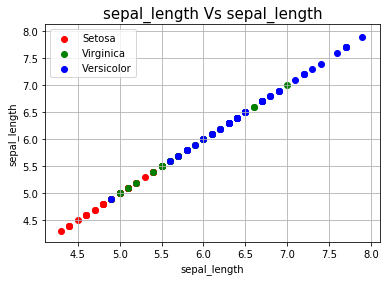

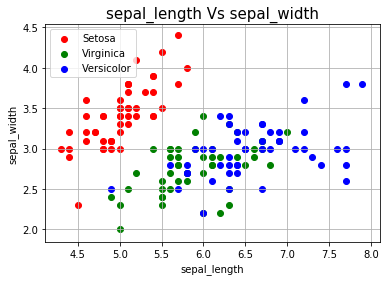

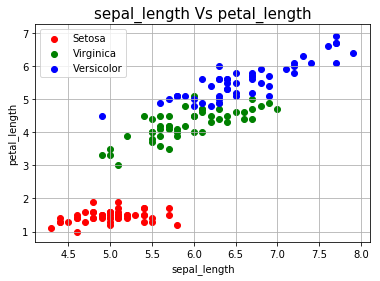

In [36]:
i=0
for j in range(0, 3):
#     j=j+1
#     print(iris_data.columns[i],"Vs "+iris_data.columns[j])
    plt.figure()
    plt.scatter(iris_setosa[iris_data.columns[i]],iris_setosa[iris_data.columns[j]], color='r', label='Setosa')
    plt.scatter(iris_virginica[iris_data.columns[i]],iris_virginica[iris_data.columns[j]], color='g', label='Virginica')
    plt.scatter(iris_versicolor[iris_data.columns[i]],iris_versicolor[iris_data.columns[j]], color='b', label='Versicolor')
    plt.title("{0} Vs {1}".format(iris_data.columns[i],iris_data.columns[j]),fontsize=15)
    plt.xlabel(iris_data.columns[i])
    plt.ylabel(iris_data.columns[j])
    plt.legend(loc=2)
    plt.grid()

1 0
1 1
1 2


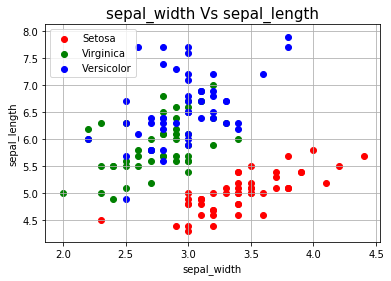

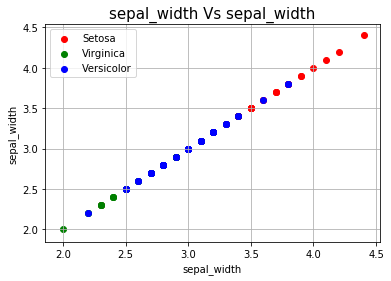

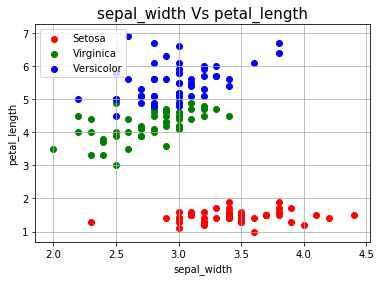

In [37]:
i=1
for j in range(0, 3):
#     j=j+1
    print(i,j)
    plt.figure()
    plt.scatter(iris_setosa[iris_data.columns[i]],iris_setosa[iris_data.columns[j]], color='r', label='Setosa')
    plt.scatter(iris_virginica[iris_data.columns[i]],iris_virginica[iris_data.columns[j]], color='g', label='Virginica')
    plt.scatter(iris_versicolor[iris_data.columns[i]],iris_versicolor[iris_data.columns[j]], color='b', label='Versicolor')
    plt.title("{0} Vs {1}".format(iris_data.columns[i],iris_data.columns[j]),fontsize=15)
    plt.xlabel(iris_data.columns[i])
    plt.ylabel(iris_data.columns[j])
    plt.legend(loc=2)
    plt.grid()

2 0
2 1
2 2


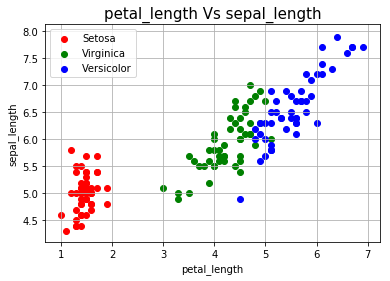

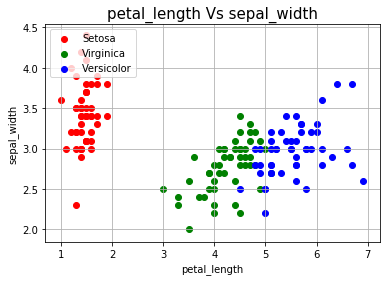

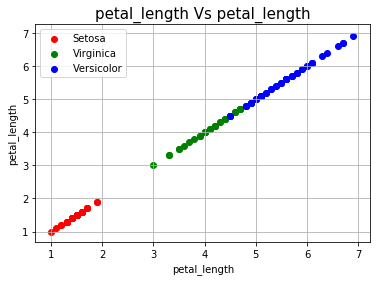

In [38]:
i=2
for j in range(0, 3):
#     j=j+1
    print(i,j)
    plt.figure()
    plt.scatter(iris_setosa[iris_data.columns[i]],iris_setosa[iris_data.columns[j]], color='r', label='Setosa')
    plt.scatter(iris_virginica[iris_data.columns[i]],iris_virginica[iris_data.columns[j]], color='g', label='Virginica')
    plt.scatter(iris_versicolor[iris_data.columns[i]],iris_versicolor[iris_data.columns[j]], color='b', label='Versicolor')
    plt.title("{0} Vs {1}".format(iris_data.columns[i],iris_data.columns[j]),fontsize=15)
    plt.xlabel(iris_data.columns[i])
    plt.ylabel(iris_data.columns[j])
    plt.legend(loc=2)
    plt.grid()

3 0
3 1
3 2


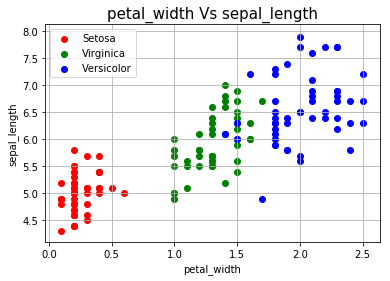

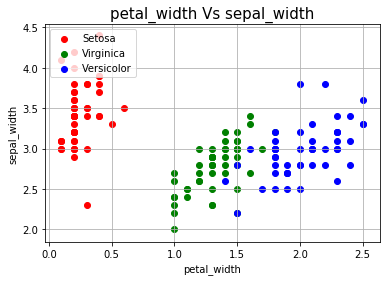

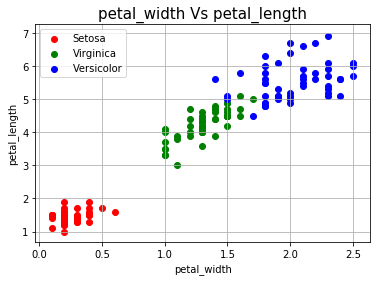

In [39]:
i=3
for j in range(0, 3):
#     j=j+1
    print(i,j)
    plt.figure()
    plt.scatter(iris_setosa[iris_data.columns[i]],iris_setosa[iris_data.columns[j]], color='r', label='Setosa')
    plt.scatter(iris_virginica[iris_data.columns[i]],iris_virginica[iris_data.columns[j]], color='g', label='Virginica')
    plt.scatter(iris_versicolor[iris_data.columns[i]],iris_versicolor[iris_data.columns[j]], color='b', label='Versicolor')
    plt.title("{0} Vs {1}".format(iris_data.columns[i],iris_data.columns[j]),fontsize=15)
    plt.xlabel(iris_data.columns[i])
    plt.ylabel(iris_data.columns[j])
    plt.legend(loc=2)
    plt.grid()

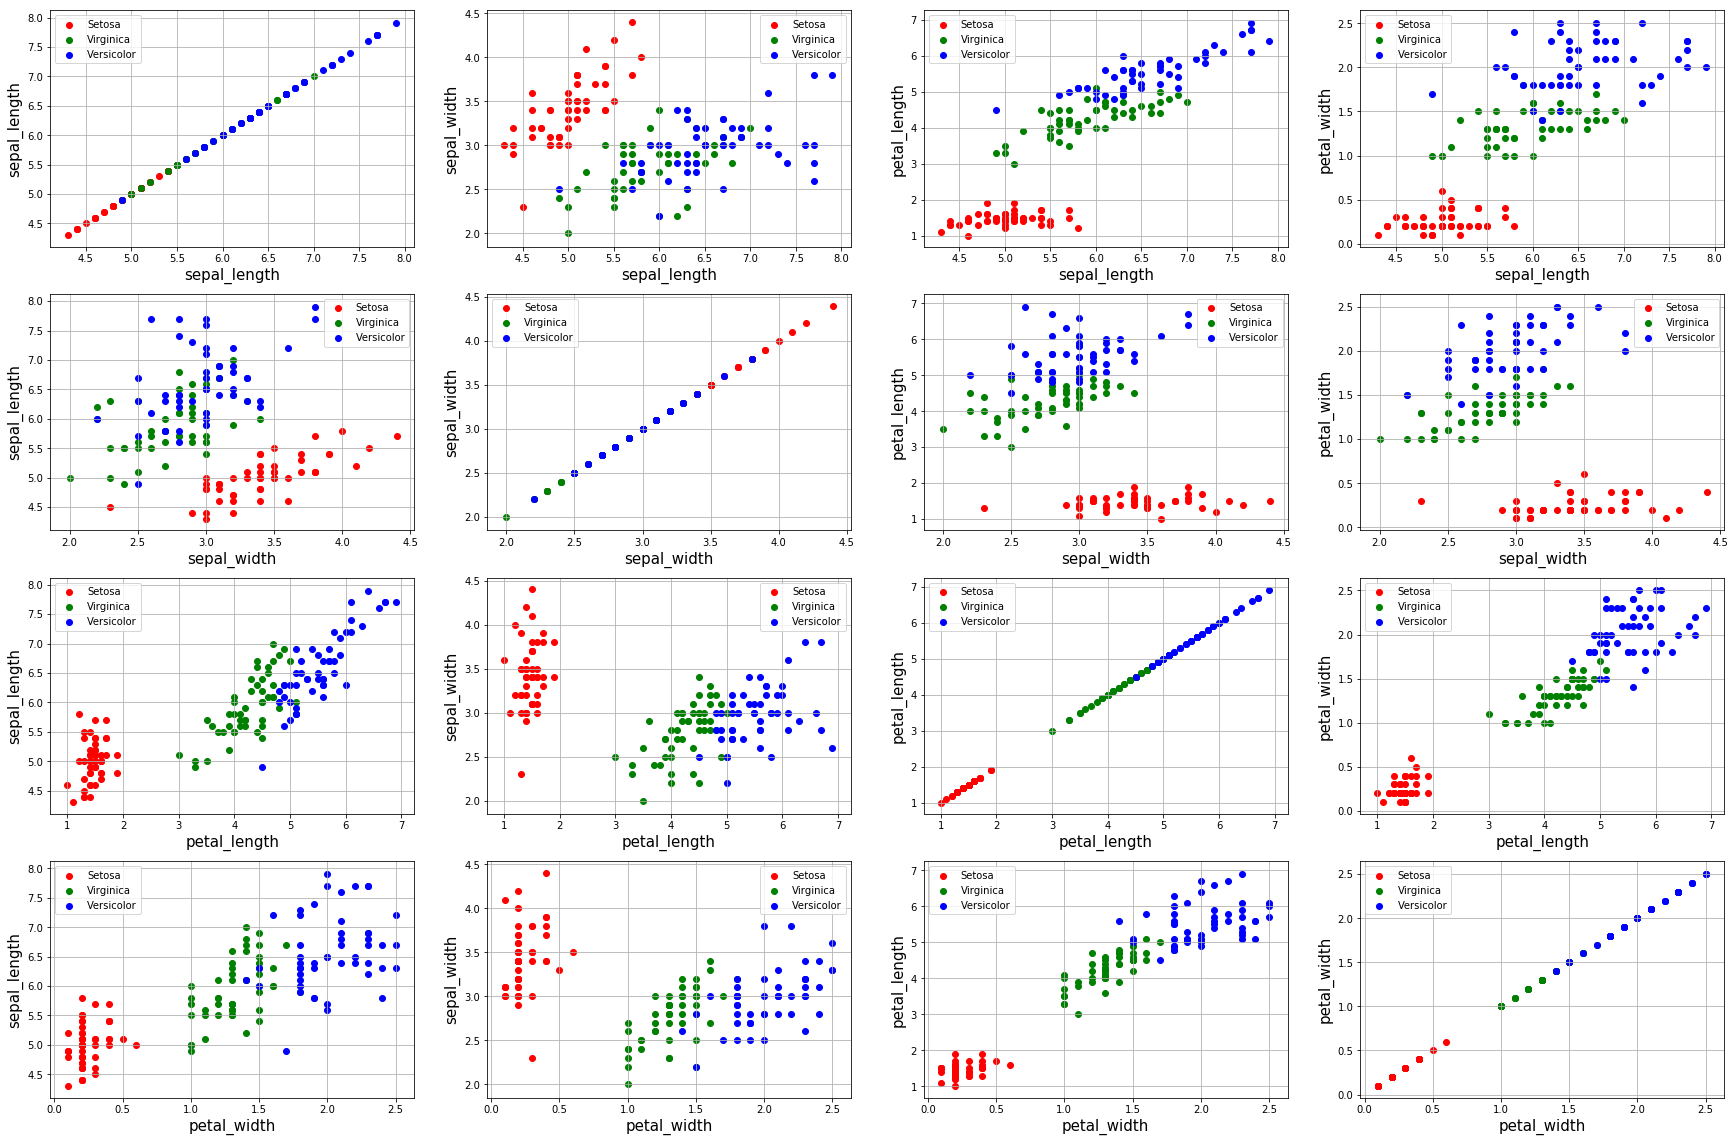

In [40]:
# pair wise plot of each feature
plt.figure(figsize=(30, 20))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4, 4, i*4+j+1)
        plt.scatter(iris_setosa[cols[i]], iris_setosa[cols[j]], color='r', label='Setosa')
        plt.scatter(iris_virginica[cols[i]], iris_virginica[cols[j]], color='g', label='Virginica')
        plt.scatter(iris_versicolor[cols[i]], iris_versicolor[cols[j]], color='b', label='Versicolor')
#         plt.title("{0} Vs {1}".format(iris_data.columns[i],iris_data.columns[j]),fontsize=15)
        plt.xlabel(cols[i], fontsize=15)
        plt.ylabel(cols[j], fontsize=15)
        plt.legend()
        plt.grid()

# plt.savefig("IRIS.png")

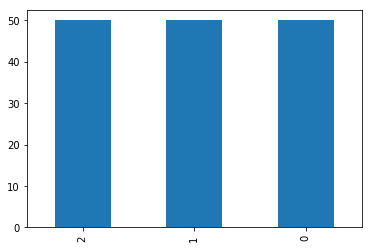

In [41]:
iris_data['flower'].value_counts().plot(kind='bar')

In [42]:
x = iris_data[['petal_length', 'petal_width']]
y = iris_data['flower']

### Lets test out our model

In [43]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=6354)

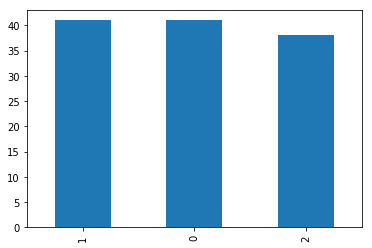

In [44]:
y_train.value_counts().plot(kind='bar')

In [45]:
# taking only first 40

# iris_setosa = iris_data[iris_data['flower'] == 0][['petal_length', 'petal_width', 'flower']]
# iris_virginica = iris_data[iris_data['flower'] == 2][['petal_length', 'petal_width', 'flower']]
# iris_versicolor = iris_data[iris_data['flower'] == 1][['petal_length', 'petal_width', 'flower']]

# training_set = pd.concat([iris_setosa.iloc[0:40],iris_virginica.iloc[0:40],iris_versicolor.iloc[0:40]])
# X_train, y_train = training_set[['petal_length', 'petal_width']], training_set['flower']

# testing_set = pd.concat([iris_setosa.iloc[40:],iris_virginica.iloc[40:],iris_versicolor.iloc[40:]])
# X_test, y_test = testing_set[['petal_length', 'petal_width']], testing_set['flower']

In [46]:
classifier = SVC(kernel='linear')
model = classifier.fit(X_train, y_train)

In [47]:
obtained_y = model.predict(X_test)

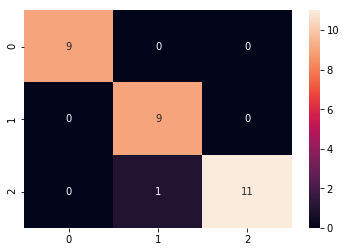

In [48]:
import seaborn as sb
sb.heatmap(metrics.confusion_matrix(y_test, obtained_y), annot=True)

In [49]:
print(metrics.classification_report(y_test, obtained_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



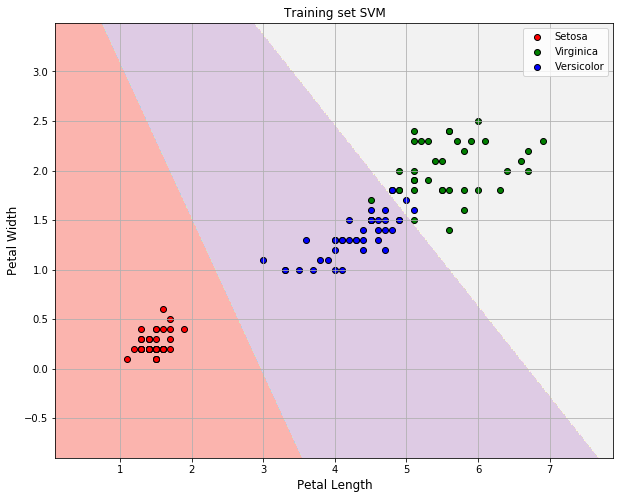

In [50]:
plt.figure(figsize=(10, 8))
x_min, x_max = X_train['petal_length'].min() - 1, X_train['petal_length'].max() + 1
y_min, y_max = X_train['petal_width'].min() - 1, X_train['petal_width'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape) #contour needs a square matrix
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

iris_setosa = X_train[y_train == 0][['petal_length', 'petal_width']]
iris_virginica = X_train[y_train == 2][['petal_length', 'petal_width']]
iris_versicolor = X_train[y_train == 1][['petal_length', 'petal_width']]

plt.scatter(iris_setosa['petal_length'], iris_setosa['petal_width'], color='r', label='Setosa', edgecolors='black')
plt.scatter(iris_virginica['petal_length'], iris_virginica['petal_width'], color='g', label='Virginica', edgecolors='black')
plt.scatter(iris_versicolor['petal_length'], iris_versicolor['petal_width'], color='b', label='Versicolor', edgecolors='black')
plt.legend()
plt.grid()
plt.xlabel("Petal Length", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)
plt.title("Training set SVM")
plt.savefig("iris_svm.png")
plt.show()